# Non-Peptide Angiotensin II Receptor Antagonists for pharmacophore identification

We explore ligands that will be used to create ligand-based pharmacophore models

In [1]:
import openpharmacophore as oph

import nglview as nv
from rdkit import Chem
from rdkit.Chem import Draw

import os
from pprint import pprint
from IPython.display import SVG

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

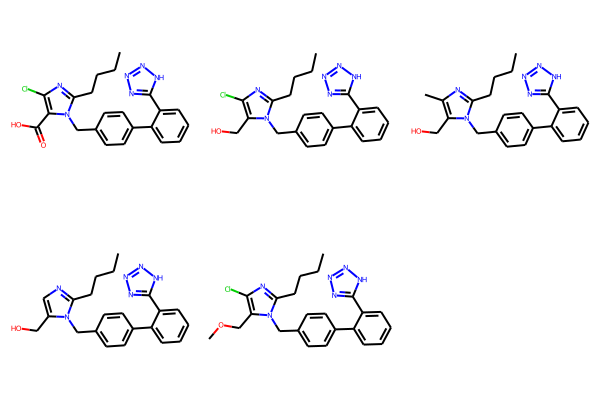

In [2]:
ligands = Chem.SmilesMolSupplier("ligands.smi")
Draw.MolsToGridImage(ligands, molsPerRow=3)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

In [3]:
# Add hydrogens and draw them again

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

In [4]:
pharmacophore.generate_conformers(n_confs=-1, ligands="all")

In [8]:
print([l.GetNumConformers() for l in pharmacophore.ligands])

[111, 110, 106, 100, 134]


## View 3D structures

In [5]:
lig_ind = 2
conf_ind = 2
nv.show_rdkit(pharmacophore.ligands[lig_ind], conf_ind=conf_ind)

NGLWidget()

## Chemical features

We find chemical features in the ligands and visualize them.

In [6]:
pharmacophore.find_chem_feats()
pprint(pharmacophore.feats)

[{'A': [(5,), (25,), (26,), (27,), (10,), (11,)],
  'D': [(28,)],
  'H': [(1, 0), (1, 2, 3), (0,), (7,)],
  'N': [(9, 10, 11)],
  'P': [],
  'R': [(4, 5, 6, 8, 12),
        (24, 25, 26, 27, 28),
        (14, 15, 16, 17, 29, 30),
        (18, 19, 20, 21, 22, 23)]},
 {'A': [(5,), (24,), (25,), (26,), (10,)],
  'D': [(27,), (10,)],
  'H': [(1, 0), (1, 2, 3), (0,), (7,)],
  'N': [],
  'P': [],
  'R': [(4, 5, 6, 8, 11),
        (23, 24, 25, 26, 27),
        (13, 14, 15, 16, 28, 29),
        (17, 18, 19, 20, 21, 22)]},
 {'A': [(5,), (24,), (25,), (26,), (10,)],
  'D': [(27,), (10,)],
  'H': [(1, 0), (1, 2, 3), (0,), (7,)],
  'N': [],
  'P': [],
  'R': [(4, 5, 6, 8, 11),
        (23, 24, 25, 26, 27),
        (13, 14, 15, 16, 28, 29),
        (17, 18, 19, 20, 21, 22)]},
 {'A': [(5,), (23,), (24,), (25,), (9,)],
  'D': [(26,), (9,)],
  'H': [(1, 0), (1, 2, 3), (0,)],
  'N': [],
  'P': [],
  'R': [(4, 5, 6, 7, 10),
        (22, 23, 24, 25, 26),
        (12, 13, 14, 15, 27, 28),
        (16, 17, 

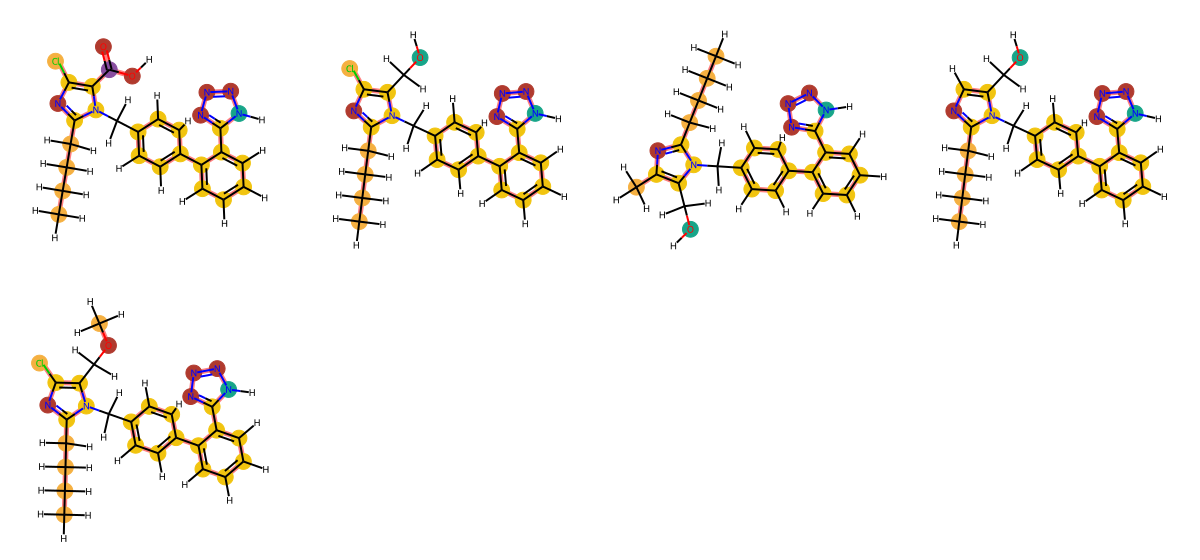

In [7]:
drawing = pharmacophore.draw((300, 280))
SVG(drawing.GetDrawingText())

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm